# In this dataset we are going to predict a  Doctor's Consultation Fee 

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [231]:
#loading the train dataset
df=pd.read_csv('Final_Train.Csv')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [330]:
#loading the test dataset
df1=pd.read_csv('Final_Test.Csv')
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Now from here ,we first analyze the train data and then the same process is repeated for test data.

If we concate train & test data,then there is a chance of data leakage,so we analyze them seperately

# TRAIN DATA

In [233]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [234]:
#checking columns name
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

# columns description

In [235]:
#checking shape of dataset
df.shape

(5961, 7)

The given dataset contains 5961 rows & 7 column


In [236]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [237]:
#checking the datatype
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

OBSERVATION:

1.All the columns are of object datatype except Fees

2.Fees is of int64 datatype

In [238]:
#checking for null values
df.isnull().values.any()

True

It means that null values are present in our dataset

In [239]:
#checking for null values in each column
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observation:

1. 3302 null values are present in rating column

2. 25 null values are present in place column

3. 2620 null values are present in Miscellaneous_Info    

we acn also check it via visualization

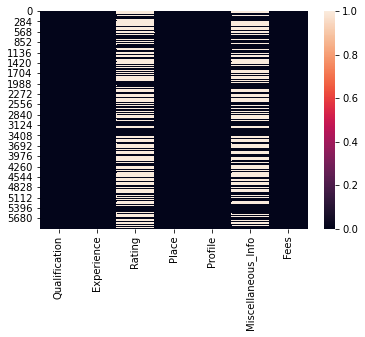

In [240]:
#visualization
sns.heatmap(df.isnull())

In [242]:
#imputing the missing values with mode

for col in ['Place','Miscellaneous_Info']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [243]:
df['Rating'].fillna('0%', inplace=True)

In [244]:
#now again checking for missing values

df.isnull().values.any()

False

Now our null values is removed.We can see it via visualisation

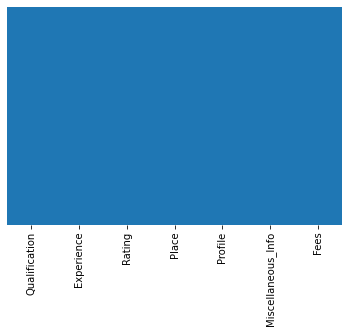

In [245]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')

# Summary Statistics

In [246]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


OBSERVATION:

# Exploring Data Variables

In [247]:
#printing objects datatypes & their unique values

for col in df.columns:
    if df[col].dtype==object:
        print(str(col) +':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('******************************************************************************')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                     488
BHMS                                                                                    477
BAMS                                                                                    471
MBBS                                                                                    334
MBBS, MS - ENT                                                                          220
                                                                                       ... 
MD - General Medicine, DM - Nephrology, MBBS                                              1



Here we see the summary of categorical column

# Now our data is ready for visualization without any missing data

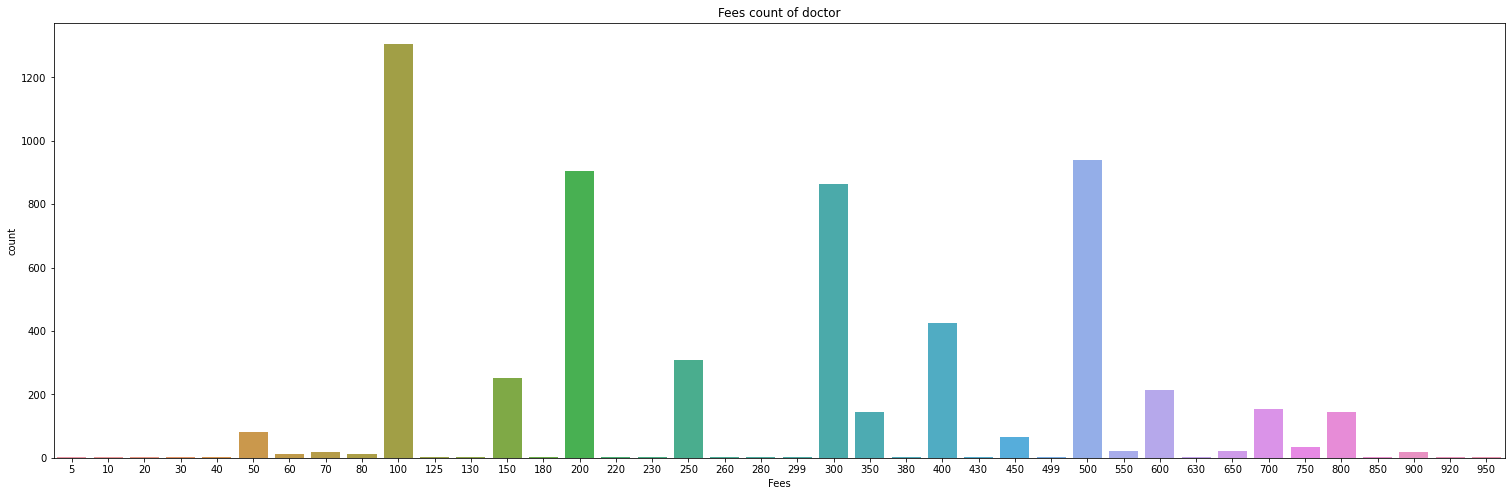

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [248]:
#checking Fees count of doctor

plt.subplots(figsize=(26,8))
sns.countplot(x='Fees',data=df)
plt.title('Fees count of doctor')
plt.show()

print(df['Fees'].value_counts())

Observation:

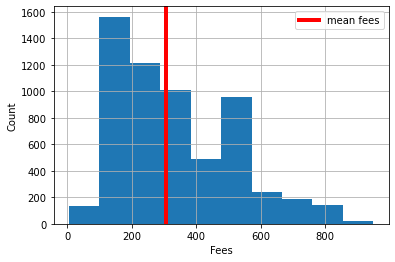

In [249]:
#checking the mean fees
fees=df['Fees'].hist()
mean_val=np.mean(df['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('Fees')
plt.ylabel('Count')
plt.legend()
plt.show()

In [250]:
df['Place']

0                 Kakkanad, Ernakulam
1               Whitefield, Bangalore
2          Mathikere - BEL, Bangalore
3        Bannerghatta Road, Bangalore
4               Keelkattalai, Chennai
                    ...              
5956          Basavanagudi, Bangalore
5957            Nungambakkam, Chennai
5958    Greater Kailash Part 2, Delhi
5959           Vileparle West, Mumbai
5960                 Pitampura, Delhi
Name: Place, Length: 5961, dtype: object

In [251]:
#splitting place into city & locality
df['City'] = df['Place'].str.split(',').str[1]
df['Locality'] = df['Place'].str.split(',').str[0]

In [252]:
df['City'].nunique()

9

In [253]:
df['years_exp'] = df['Experience'].str.slice(stop=2).astype(int)

In [254]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [255]:
#seperating the degree and the specialization from qualification column
df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_3'] = df['Qualification'].str.split(',').str[2]

In [256]:
df['Miscellaneous_Info']

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2       Acrylic Partial Denture Crowns and Bridges Fix...
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
5956              98% 45 Feedback Basavanagudi, Bangalore
5957    Acrylic Partial Denture Crowns and Bridges Fix...
5958        97% 11 Feedback Greater Kailash Part 2, Delhi
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: Miscellaneous_Info, Length: 5961, dtype: object

In [257]:
#We see that 'Miscellaneous_Info' is a combination of rating,place,qualification .So, we can drop them

In [258]:
df.drop(['Qualification','Place','Experience','Miscellaneous_Info'],axis=1,inplace=True)

In [259]:
df.head()

,Rating,Profile,Fees,City,Locality,years_exp,Qual_1,Qual_2,Qual_3
0,100,Homeopath,100,Ernakulam,Kakkanad,24,BHMS,MD - Homeopathy,NaN
1,98,Ayurveda,350,Bangalore,Whitefield,12,BAMS,MD - Ayurveda Medicine,NaN
2,0,ENT Specialist,300,Bangalore,Mathikere - BEL,9,MBBS,MS - Otorhinolaryngology,NaN
3,0,Ayurveda,250,Bangalore,Bannerghatta Road,12,BSc - Zoology,BAMS,NaN
4,100,Ayurveda,250,Chennai,Keelkattalai,20,BAMS,NaN,NaN


In [260]:
df.isnull().sum()

Rating          0
Profile         0
Fees            0
City            1
Locality        0
years_exp       0
Qual_1          0
Qual_2       1962
Qual_3       4590
dtype: int64

In [261]:
#imputing the missing values 

for col in ['City','Qual_2','Qual_3']:
    df[col].fillna('XXX',inplace=True)

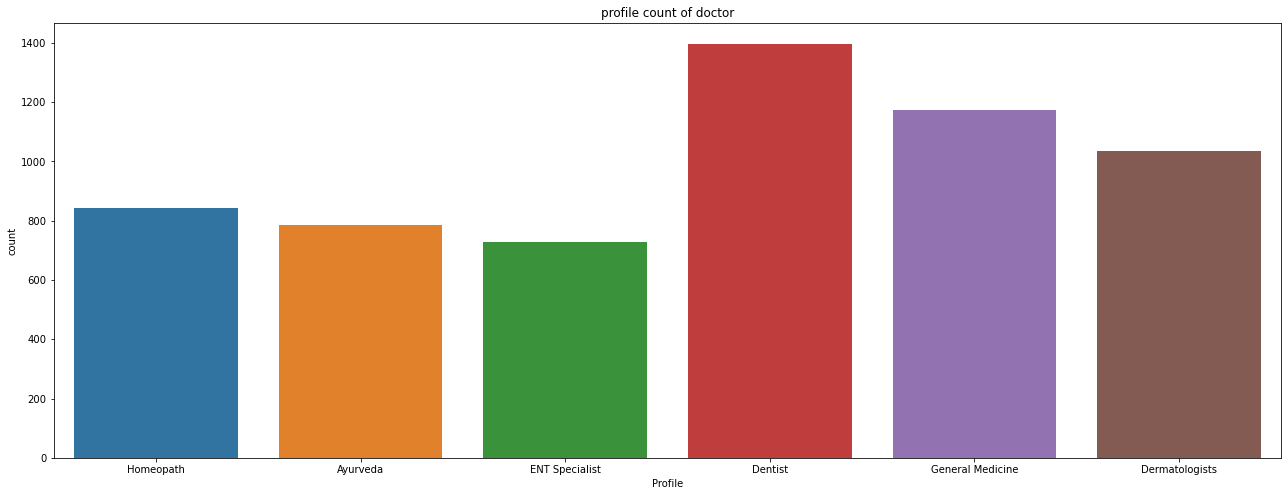

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [262]:
#count by profile

plt.subplots(figsize=(22,8))
sns.countplot(x='Profile',data=df)
plt.title('profile count of doctor')
plt.show()

print(df['Profile'].value_counts())

    In the given dataset ,1397 dentist are present(whch is maxm),& 728 ENT Specialist are there

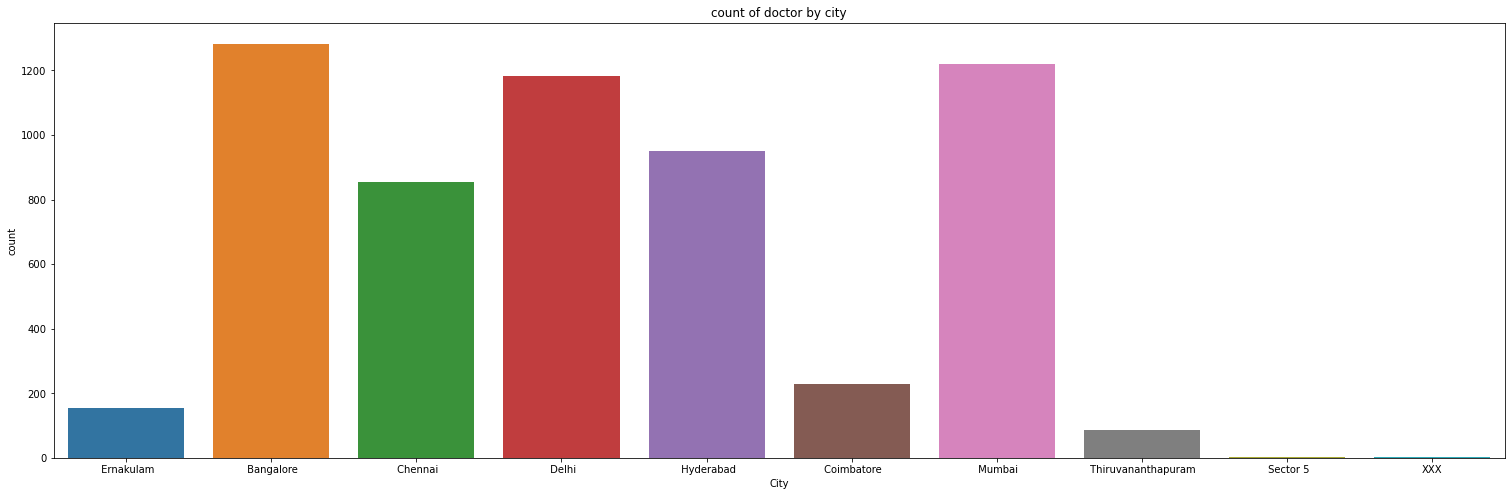

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
XXX                       1
 Sector 5                 1
Name: City, dtype: int64


In [263]:
#checking count of doctor by cities

plt.subplots(figsize=(26,8))
sns.countplot(x='City',data=df)
plt.title('count of doctor by city')
plt.show()

print(df['City'].value_counts())

1.Most of the doctors(.ie 1284) are located in Bangalore 

2.Only 1 doctor is located in Sector 5

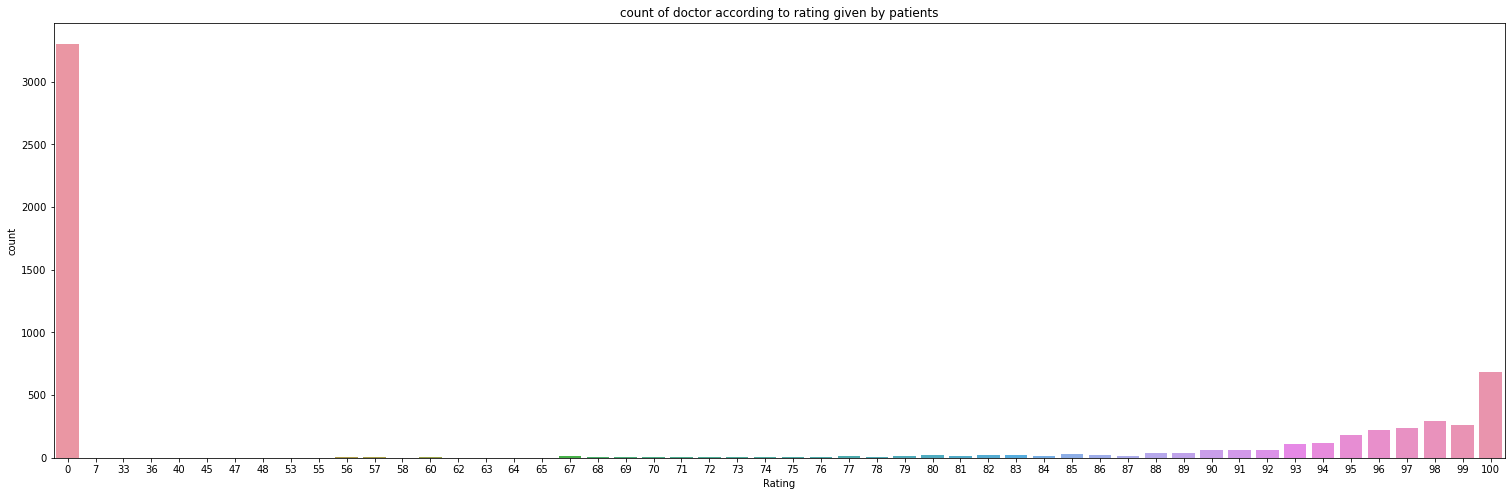

0      3302
100     684
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
79       13
84       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
68        5
56        5
69        4
70        4
72        3
57        3
64        2
63        2
62        2
33        2
55        2
53        1
65        1
47        1
7         1
58        1
48        1
40        1
36        1
45        1
Name: Rating, dtype: int64


In [264]:
#check count of doctors accordng to ratings given by patients

plt.subplots(figsize=(26,8))
sns.countplot(x='Rating',data=df)
plt.title('count of doctor according to rating given by patients')
plt.show()

print(df['Rating'].value_counts())

Observaton:

*.About 684 doctor gets 100 rating by the patients

*. Most of the doctors(.ie 3302 ) have missing rating(as null values in Rating column has been filled with 0% ) ,means they didn't get ratings from patients


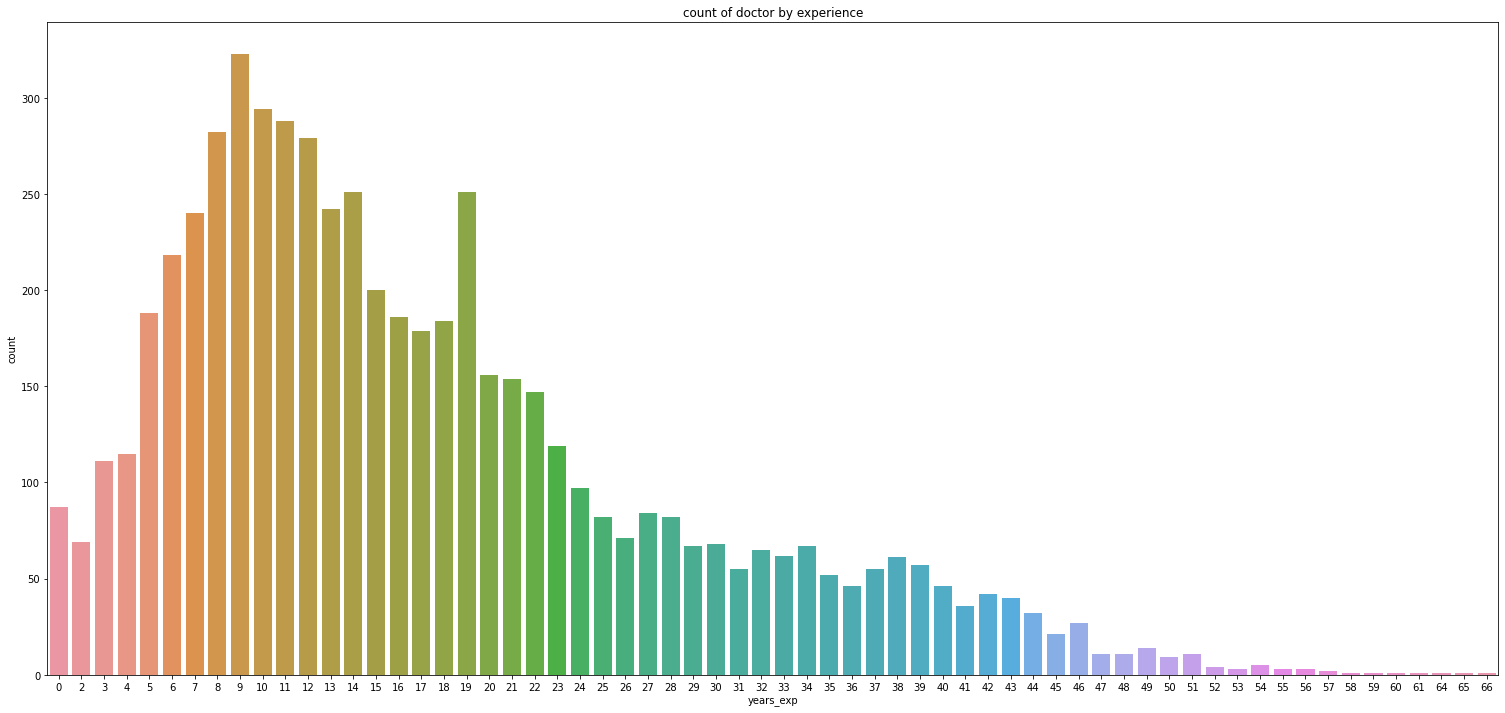

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: years_exp, Length: 64, dtype: int64


In [265]:
#checking count of doctor by year of experience

plt.subplots(figsize=(26,12))
sns.countplot(x='years_exp',data=df)
plt.title('count of doctor by experience')
plt.show()

print(df['years_exp'].value_counts())

observaton:

1.Most of the doctors(.ie 323)  have 9 years of experience

2.Around 80 doctors are with 0 years of experience

1.Only 1 doctor are having 66 years of experience

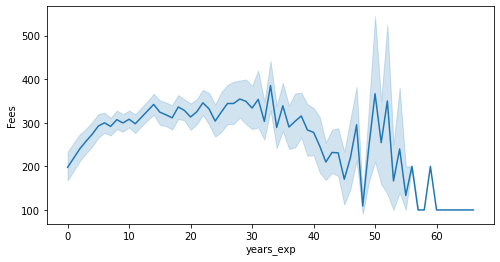

In [266]:
#lineplot between fees & years of experience
plt.figure(figsize=(8,4))
sns.lineplot(x='years_exp',y='Fees',data=df)

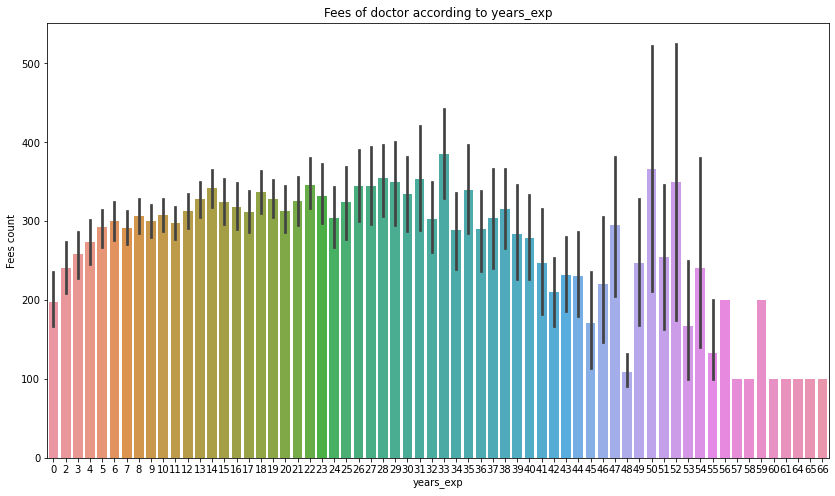

years_exp
0     197.931034
2     240.579710
3     257.747748
4     273.643478
5     292.553191
         ...    
60    100.000000
61    100.000000
64    100.000000
65    100.000000
66    100.000000
Name: Fees, Length: 64, dtype: float64


In [267]:

plt.subplots(figsize=(14,8))
sns.barplot(x='years_exp',y='Fees',data=df)
plt.title('Fees of doctor according to years_exp')
plt.xlabel('years_exp')
plt.ylabel('Fees count')
plt.show()

print(df.groupby('years_exp')['Fees'].mean())

We notice that fees is not much correlated with year of experience

In [268]:
max_fees=df.sort_values(by='Fees',ascending=False)
max_fees.head(5)

,Rating,Profile,Fees,City,Locality,years_exp,Qual_1,Qual_2,Qual_3
293,100,General Medicine,950,Chennai,Adyar,29,MBBS,MD - Internal Medicine,FRCP
3365,95,Homeopath,920,Mumbai,Dadar West,18,MD - Homeopathy,BHMS,XXX
4040,0,General Medicine,900,Delhi,East Of Kailash,31,MBBS,MS - General Surgery,XXX
4730,0,Dermatologists,900,Mumbai,Powai,23,DNB - Dermatology & Venereology,DVD,MBBS
4835,97,Dermatologists,900,Delhi,Vasant Kunj,15,MBBS,DNB - Dermatology & Venereology,DDVL


In [269]:
lowest_fees=df.sort_values(by='Fees',ascending=True)
lowest_fees.head(5)

,Rating,Profile,Fees,City,Locality,years_exp,Qual_1,Qual_2,Qual_3
1930,0,Dentist,5,Thiruvananthapuram,TV Medical College,6,BDS,XXX,XXX
3303,0,Dentist,10,Ernakulam,Perumbavoor,3,BDS,XXX,XXX
1316,0,Ayurveda,10,Mumbai,Worli,4,BAMS,XXX,XXX
4748,0,General Medicine,20,Hyderabad,Secunderabad,44,MBBS,MD - General Medicine,XXX
2563,0,Ayurveda,30,Bangalore,Marathahalli,35,MD - Ayurveda Medicine,XXX,XXX


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

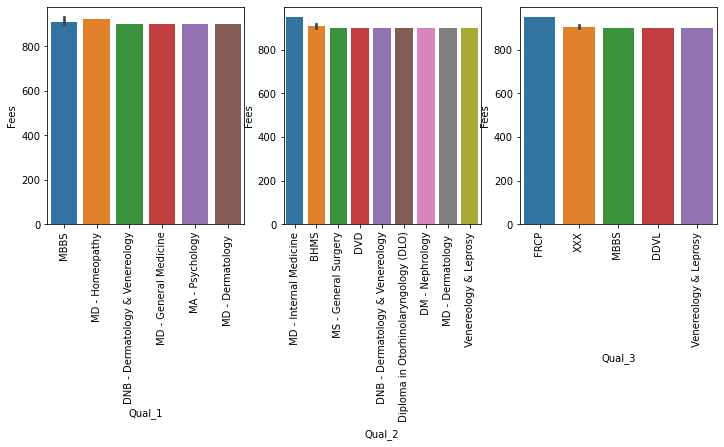

In [270]:
#maximum fees according to qualification
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x='Qual_1',y='Fees',data=max_fees.head(10))
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x='Qual_2',y='Fees',data=max_fees.head(10))
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(x='Qual_3',y='Fees',data=max_fees.head(10))
plt.xticks(rotation=90)

OBSERVATION:

Hightest fees is of doctor with qualification MBBS (MD in internal medicine) & doctor with MD in homeophathy,

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

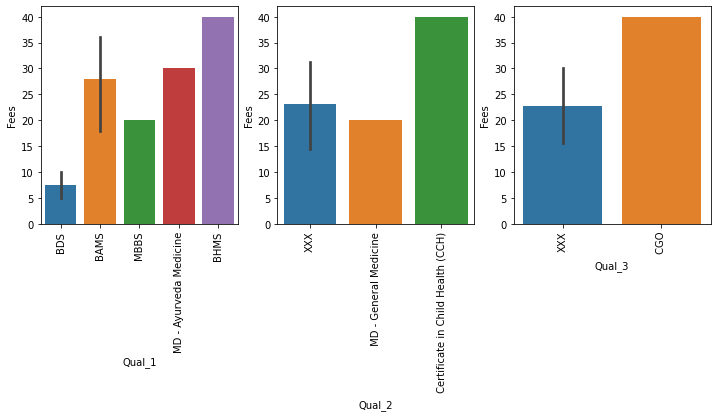

In [271]:
#minimum fees according to qualification
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x='Qual_1',y='Fees',data=lowest_fees.head(10))
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x='Qual_2',y='Fees',data=lowest_fees.head(10))
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(x='Qual_3',y='Fees',data=lowest_fees.head(10))
plt.xticks(rotation=90)

observation:

Lowest fees is of BDS which is only rs 5

In [272]:
df.groupby('City')['Fees'].mean()

City
 Bangalore             324.422447
 Chennai               283.602339
 Coimbatore            154.298246
 Delhi                 363.006757
 Ernakulam             188.431373
 Hyderabad             307.507886
 Mumbai                308.292863
 Sector 5              250.000000
 Thiruvananthapuram    167.267442
XXX                    250.000000
Name: Fees, dtype: float64

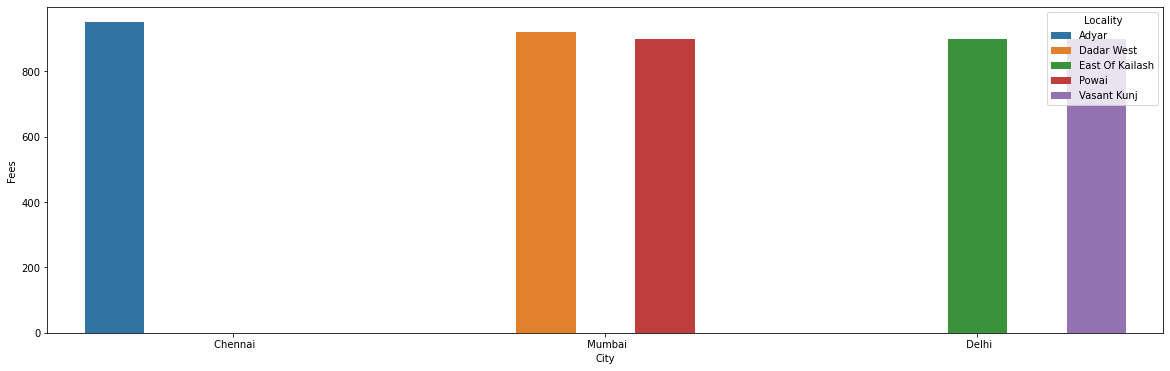

In [273]:
plt.figure(figsize=(20,6))

sns.barplot(x='City',y='Fees',data=max_fees.head(),hue='Locality')


observation:

Doctor with maximum fees is in chennai (located in Adyar),followed by mumbai(located in Dadar West& Powai) & Delhi(located in East of Kailash & Vasant kunj)

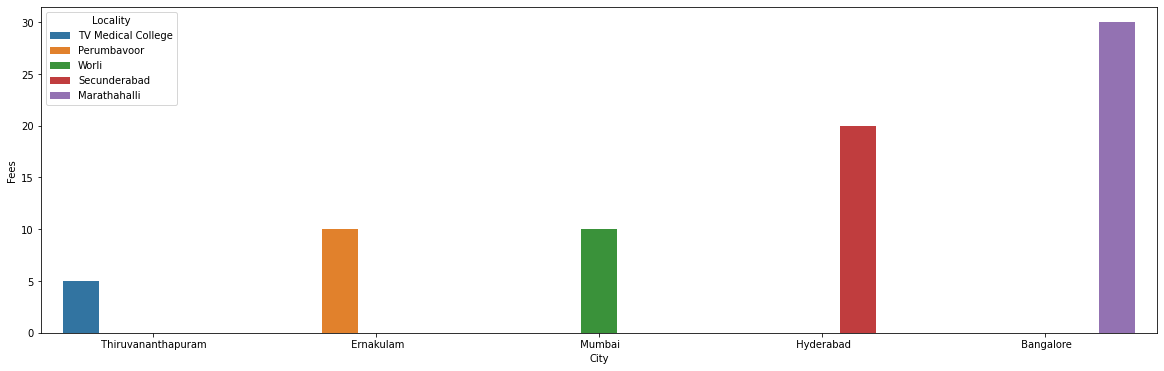

In [274]:
plt.figure(figsize=(20,6))

sns.barplot(x='City',y='Fees',data=lowest_fees.head(),hue='Locality')


observation:

Doctor with lowest fees is in Thiruvanthapuran(located in TV Medical College),followed by Ernakulam(located in Perumbavoor),Mumbai city(located in Worli)

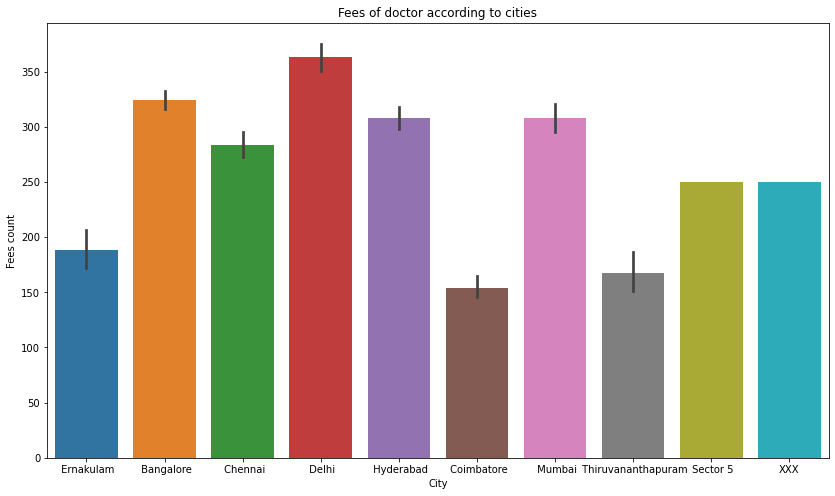

City
 Bangalore             324.422447
 Chennai               283.602339
 Coimbatore            154.298246
 Delhi                 363.006757
 Ernakulam             188.431373
 Hyderabad             307.507886
 Mumbai                308.292863
 Sector 5              250.000000
 Thiruvananthapuram    167.267442
XXX                    250.000000
Name: Fees, dtype: float64


In [275]:
#barplot between city & fees
plt.subplots(figsize=(14,8))
sns.barplot(x='City',y='Fees',data=df)
plt.title('Fees of doctor according to cities')
plt.xlabel('City')
plt.ylabel('Fees count')
plt.show()

print(df.groupby('City')['Fees'].mean())

Observation:

In Delhi ,avg. fees is  maximum & in Coimbatore avg fees is minimum

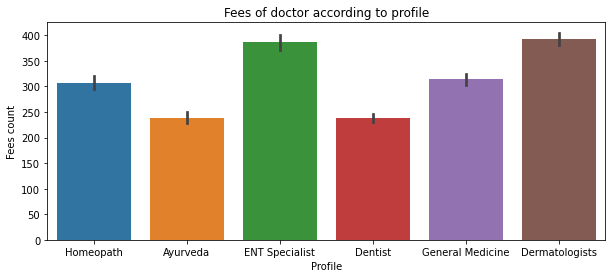

Profile
Ayurveda            238.968193
Dentist             238.199714
Dermatologists      393.133462
ENT Specialist      387.321429
General Medicine    313.908781
Homeopath           306.499407
Name: Fees, dtype: float64


In [276]:
#profile vs fees

plt.subplots(figsize=(10,4))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title('Fees of doctor according to profile')
plt.xlabel('Profile')
plt.ylabel('Fees count')
plt.show()

print(df.groupby('Profile')['Fees'].mean())

Observation:

1.The avg. fees of Dermatologist is maximum followed by ENT specialist.

2.Ayurveda  & Dentist have the lowest fees among all

In [279]:
#transform non numeric column into numeric one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=le.fit_transform(df[col])

In [280]:
df.head()

,Rating,Profile,Fees,City,Locality,years_exp,Qual_1,Qual_2,Qual_3
0,51,5,9,4,296,23,8,252,406
1,49,0,22,0,855,11,5,241,406
2,0,3,21,0,452,8,79,334,406
3,0,0,17,0,68,11,12,7,406
4,51,0,17,1,335,19,5,426,406


# checking correlation

In [281]:
df.corr()

,Rating,Profile,Fees,City,Locality,years_exp,Qual_1,Qual_2,Qual_3
Rating,1.000000,-0.136323,0.152288,-0.088597,-0.033998,-0.058331,-0.027637,-0.157958,-0.128763
Profile,-0.136323,1.000000,0.144355,-0.013748,0.019533,0.202434,0.307982,-0.000341,-0.037070
Fees,0.152288,0.144355,1.000000,-0.056100,-0.055524,-0.017621,0.229127,-0.186215,-0.110061
City,-0.088597,-0.013748,-0.056100,1.000000,-0.081273,0.037506,-0.034074,0.025153,0.018733
Locality,-0.033998,0.019533,-0.055524,-0.081273,1.000000,0.015780,0.000053,0.010913,0.004174
years_exp,-0.058331,0.202434,-0.017621,0.037506,0.015780,1.000000,0.202089,-0.044676,-0.030492
Qual_1,-0.027637,0.307982,0.229127,-0.034074,0.000053,0.202089,1.000000,-0.416106,-0.178181
Qual_2,-0.157958,-0.000341,-0.186215,0.025153,0.010913,-0.044676,-0.416106,1.000000,0.238462
Qual_3,-0.128763,-0.037070,-0.110061,0.018733,0.004174,-0.030492,-0.178181,0.238462,1.000000


Here we see correlation between the columns.



For better clarity we see it via visualization with the help of heatmap

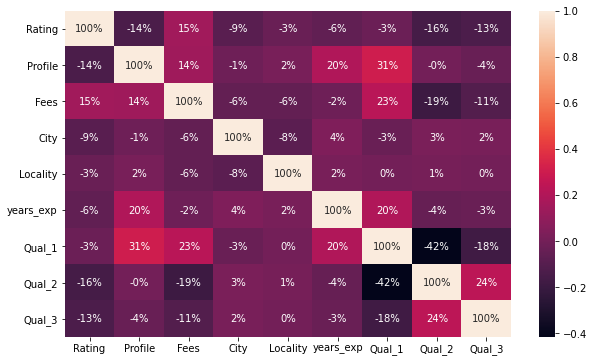

In [282]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),fmt='.0%',annot=True)

observation

profile is positively correlated with Qual_1

We notice that ,there is not much correlation between the columns

Text(0.5, 1.0, 'correlation with target variable')

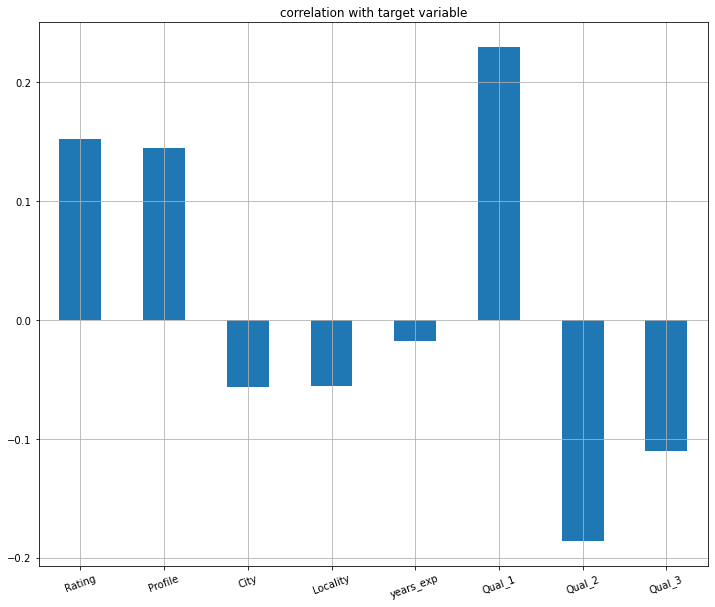

In [283]:
plt.figure(figsize=(12,10))
df.drop('Fees',axis=1).corrwith(df['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

years_exp is very less correlated with target vsriable,so we can drop it

In [284]:
df.drop('years_exp',axis=1,inplace=True)

# checking skewness

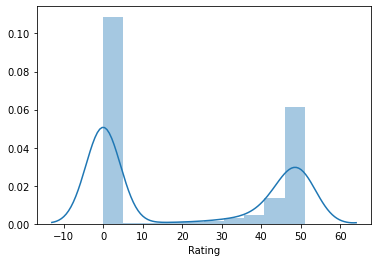

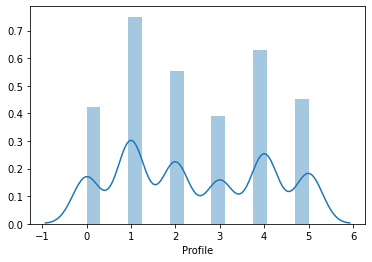

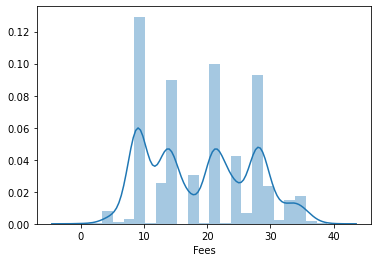

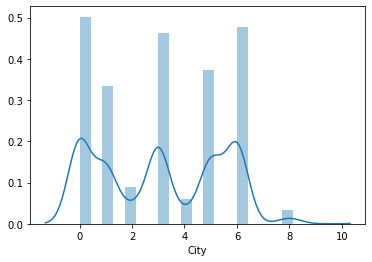

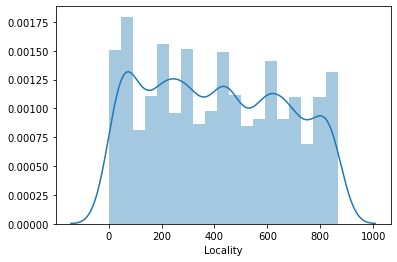

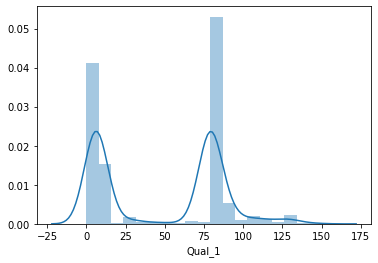

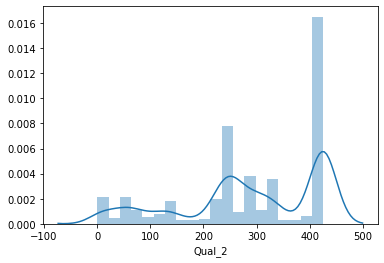

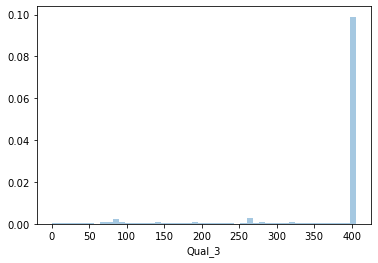

In [285]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

In [286]:
df.skew()

Rating      0.312686
Profile     0.108803
Fees        0.185038
City        0.054003
Locality    0.121186
Qual_1      0.068299
Qual_2     -0.611330
Qual_3     -2.237721
dtype: float64

Observation:

From above distplot and df.skew() ,we notice that data is not much skewed

# checking Outliers

Rating          AxesSubplot(0.125,0.71587;0.168478x0.16413)
Profile      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fees         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
City         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Locality       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Qual_1      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Qual_2      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Qual_3      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

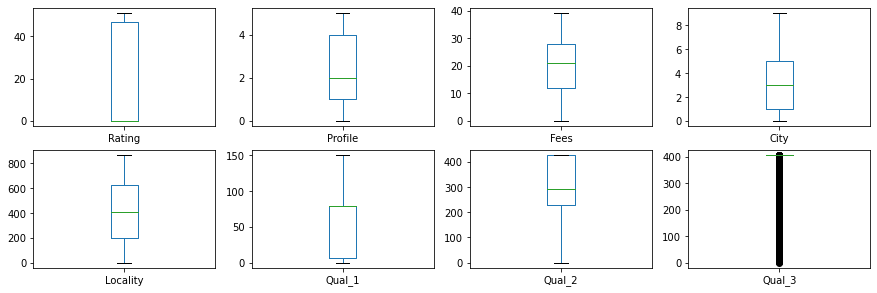

In [287]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

From above ,we see that few outliers are present in our dataset,which needs to be removed

In [288]:
#Removing outliers
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(5961, 8)
(5834, 8)


Outliers have been removed

# Feature Selection

In [289]:
df_new = pd.get_dummies(df_new, columns=['Profile'])

In [290]:
df_new.head()

,Rating,Fees,City,Locality,Qual_1,Qual_2,Qual_3,Profile_0,Profile_1,Profile_2,Profile_3,Profile_4,Profile_5
0,51,9,4,296,8,252,406,0,0,0,0,0,1
1,49,22,0,855,5,241,406,1,0,0,0,0,0
2,0,21,0,452,79,334,406,0,0,0,1,0,0
3,0,17,0,68,12,7,406,1,0,0,0,0,0
4,51,17,1,335,5,426,406,1,0,0,0,0,0


In [291]:
df_new.shape

(5834, 13)

we see that ,new dataset contains 5617 rows & 9 columns

In [292]:
#spliting the data into input and output variable
x=df_new.drop('Fees',axis=1)
x.head()

,Rating,City,Locality,Qual_1,Qual_2,Qual_3,Profile_0,Profile_1,Profile_2,Profile_3,Profile_4,Profile_5
0,51,4,296,8,252,406,0,0,0,0,0,1
1,49,0,855,5,241,406,1,0,0,0,0,0
2,0,0,452,79,334,406,0,0,0,1,0,0
3,0,0,68,12,7,406,1,0,0,0,0,0
4,51,1,335,5,426,406,1,0,0,0,0,0


In [293]:
y=df_new['Fees']
y.head()

0     9
1    22
2    21
3    17
4    17
Name: Fees, dtype: int64

In [294]:
# checking the shape of input & target variable
print(x.shape)
print(y.shape)

(5834, 12)
(5834,)


In [63]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [64]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=44)

In [65]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)


x_train_shape: (4667, 12)
x_test_shape: (1167, 12)
y_train_shape: (4667,)
y_test_shape: (1167,)


In [66]:
#Importing all the model library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing boosting model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#import error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [67]:
#pip install xgboost

In [68]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    r2_scr=r2_score(y_test,lg_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)

max r2 score corresponding to  48 is 0.17839131062368996


In [69]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=48)

In [70]:
XGB = xgb.XGBRegressor()

In [71]:
#All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGB]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of ',m,'is',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_SCORE:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

score of  LinearRegression() is 0.13200633783418614
MAE: 6.381586077240958
MSE: 56.55467923228501
RMSE: 7.5202845180408575
R2_SCORE: 0.17839131062368996
*****************************************************************************************


score of  SVR() is 0.14002243880766385
MAE: 6.031137582929556
MSE: 56.16229265081028
RMSE: 7.494150562325945
R2_SCORE: 0.1840917801393983
*****************************************************************************************


score of  DecisionTreeRegressor() is 0.9453977353820191
MAE: 6.946533643448811
MSE: 91.0358036770835
RMSE: 9.541268452207154
R2_SCORE: -0.32253967948861506
*****************************************************************************************


score of  Lasso() is 0.061494179536338955
MAE: 7.011157696644369
MSE: 63.96682838135214
RMSE: 7.997926505123195
R2_SCORE: 0.07070992633338213
*****************************************************************************************


score of  Ridge() is 0.13207599501501976
MA

# GradientBoostingRegressor giving best score & r2_score,So,I choose it as the final model

Using GridSearchCV to find best parameter

In [72]:
parameters={'learning_rate':[0.01,0.02,0.03,0.04],'subsample':[0.9,0.5,0.2,0.1],'n_estimators':[100,500,1000],'max_depth':[4,6,8,10]}
gbr=GradientBoostingRegressor()

clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.9}


In [73]:
#using GradientBoostingREgressor with its best parameters
gbr=GradientBoostingRegressor(learning_rate=0.01,max_depth=6,n_estimators=1000,subsample=0.9)
gbr.fit(x_train,y_train)
print('Score:',gbr.score(x_train,y_train))
y_pred=gbr.predict(x_test)
print('\n')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_SCORE:',r2_score(y_test,y_pred))

Score: 0.5464461688092759


MAE: 5.717669019823117
MSE: 49.327695603419876
RMSE: 7.023367824870052
R2_SCORE: 0.28338266815695456


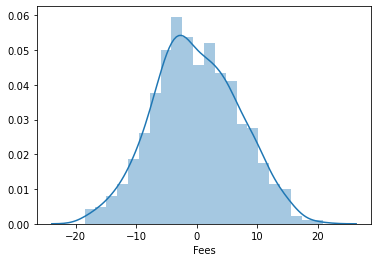

In [74]:
#plotting the distribution plot
sns.distplot(y_test-y_pred)
plt.show()

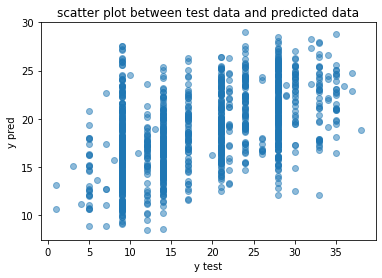

In [75]:
#scatter plot between test data & predicted data
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.title('scatter plot between test data and predicted data')
plt.show()

In [76]:
#saving the model

import joblib
joblib.dump(gbr,'doctor_consultation_fee_gbr.pkl')

['doctor_consultation_fee_gbr.pkl']

# loading Test dataset

In [331]:
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [332]:
#checking columns names
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [333]:
#checking shape of test data
df1.shape

(1987, 6)

In [334]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [335]:
#checking datatypes of test data
df1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [336]:
#checking for null values in each column
df1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [339]:
#imputing the missing values with mode

for col in ['Place','Miscellaneous_Info']:
    df1[col].fillna(df1[col].mode()[0],inplace=True)


print(df1['Rating'].fillna('0%', inplace=True))

#now again checking for missing values

print(df1.isnull().values.any())

#splitting place into city & locality
df1['City'] = df1['Place'].str.split(',').str[1]
df1['Locality'] = df1['Place'].str.split(',').str[0]



None
False


In [340]:
df1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
City                  object
Locality              object
dtype: object

In [341]:
df1['years_exp'] = df1['Experience'].str.slice(stop=2).astype(int)

df1['Rating'] = df1['Rating'].str.slice(stop=-1).astype(int)

#seperating the degree and the specialization from qualification column
df1['Qual_1'] = df1['Qualification'].str.split(',').str[0]
df1['Qual_2'] = df1['Qualification'].str.split(',').str[1]
df1['Qual_3'] = df1['Qualification'].str.split(',').str[2]

#We see that 'Miscellaneous_Info' is a combination of rating,place,qualification .So, we can drop them

df1.drop(['Qualification','Place','Experience','Miscellaneous_Info'],axis=1,inplace=True)

print(df1.isnull().sum())


Rating          0
Profile         0
City            0
Locality        0
years_exp       0
Qual_1          0
Qual_2        609
Qual_3       1498
dtype: int64


In [342]:
#imputing the missing values 

for col in ['Qual_2','Qual_3']:
    df1[col].fillna('XXX',inplace=True)

In [343]:
#dropping years_exp column
df1.drop('years_exp',axis=1,inplace=True)

In [346]:
#transform non numeric column into numeric one

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1.columns:
    if df1[col].dtype==np.number:
        continue
    df1[col]=le.fit_transform(df1[col])
    
    
    

In [347]:
df1 = pd.get_dummies(df1, columns=['Profile'])

In [348]:
df_new.columns

Index(['Rating', 'Fees', 'City', 'Locality', 'Qual_1', 'Qual_2', 'Qual_3',
       'Profile_0', 'Profile_1', 'Profile_2', 'Profile_3', 'Profile_4',
       'Profile_5'],
      dtype='object')

In [349]:
df1.columns

Index(['Rating', 'City', 'Locality', 'Qual_1', 'Qual_2', 'Qual_3', 'Profile_0',
       'Profile_1', 'Profile_2', 'Profile_3', 'Profile_4', 'Profile_5'],
      dtype='object')

The columns in the test dataset(.ie df1) match with the train dataset(.ie df) and is ready for prediction of fees

In [350]:
model = joblib.load("doctor_consultation_fee_gbr.pkl")
fee_prediction = model.predict(df1)
print(fee_prediction)

[18.3937064  18.47446382 17.42505873 ... 18.63332985 21.63263843
 15.74800895]
